In [5]:
import torch
import numpy as np

# Creating tensors

In [6]:
np.set_printoptions(precision=3)

# Create tensor
a = [1, 2, 3]
b = np.array([4, 5, 6], dtype=np.int32)
t_a = torch.tensor(a)
t_b = torch.from_numpy(b)
print(t_a)
print(t_b)

tensor([1, 2, 3])
tensor([4, 5, 6], dtype=torch.int32)


In [7]:
# Random tensor
rand_tensor = torch.rand(2,3)
print(rand_tensor)

tensor([[0.6025, 0.3602, 0.5024],
        [0.5572, 0.1817, 0.1218]])


In [8]:
# Change tensor datatype
t_a_new = t_a.to(torch.int64)
print(t_a_new.dtype)

torch.int64


In [9]:
# Change shape
## Transpose
t = torch.rand(3, 5)
t_tr = torch.transpose(t, 0, 1)
print(t.shape, ' --> ', t_tr.shape)

## Reshape
t = torch.zeros(30)
t_reshape = t.reshape(5, 6)
print(t_reshape.shape)

## Remove unecessary dimensions
t = torch.zeros(1, 2, 1, 4, 1)
t_sqz = torch.squeeze(t, 2)
print(t.shape, ' --> ', t_sqz.shape)

torch.Size([3, 5])  -->  torch.Size([5, 3])
torch.Size([5, 6])
torch.Size([1, 2, 1, 4, 1])  -->  torch.Size([1, 2, 4, 1])


# Tensors maths operations

In [13]:
torch.manual_seed(1)
t1 = 2 * torch.rand(5, 2) - 1
t2 = torch.normal(mean=0, std=1, size=(5, 2))

## Multiply
t3 = torch.multiply(t1, t2)
print(t3)

## Mean
t4 = torch.mean(t1, axis=0)
print(t4)

## Matmul
t5 = torch.matmul(t1, torch.transpose(t2, 0, 1))
print(t5)

t6 = torch.matmul(torch.transpose(t1, 0, 1), t2)
print(t6)

## Norm
norm_t1 = torch.linalg.norm(t1, ord=2, dim=1)
print(norm_t1)

tensor([[ 0.4426, -0.3114],
        [ 0.0660, -0.5970],
        [ 1.1249,  0.0150],
        [ 0.1569,  0.7107],
        [-0.0451, -0.0352]])
tensor([-0.1373,  0.2028])
tensor([[ 0.1312,  0.3860, -0.6267, -1.0096, -0.2943],
        [ 0.1647, -0.5310,  0.2434,  0.8035,  0.1980],
        [-0.3855, -0.4422,  1.1399,  1.5558,  0.4781],
        [ 0.1822, -0.5771,  0.2585,  0.8676,  0.2132],
        [ 0.0330,  0.1084, -0.1692, -0.2771, -0.0804]])
tensor([[ 1.7453,  0.3392],
        [-1.6038, -0.2180]])
tensor([0.6785, 0.5078, 1.1162, 0.5488, 0.1853])


# Split, Stack, Cancat Tensors

In [ ]:
torch.manual_seed(1)
t = torch.rand(6)
print(t)

t_splits = torch.chunk(t, 3)
[item.numpy() for item in t_splits]

tensor([0.7576, 0.2793, 0.4031, 0.7347, 0.0293, 0.7999])


[array([0.758, 0.279], dtype=float32),
 array([0.403, 0.735], dtype=float32),
 array([0.029, 0.8  ], dtype=float32)]

In [ ]:
torch.manual_seed(1)
t = torch.rand(5)
print(t)

t_splits = torch.split(t, split_size_or_sections=[3, 2])
[item.numpy() for item in t_splits]

A = torch.ones(3)
B = torch.zeros(2)
C = torch.cat([A, B], axis=0)
print(C)

A = torch.ones(3)
B = torch.zeros(3)
S = torch.stack([A, B], axis=1)
print(S)

# Pipeline

In [16]:
# DataLoader use for implementing dara loading, batching.
from torch.utils.data import DataLoader

# Create dataset of list value 1 to 5
t = torch.arange(6, dtype=torch.float32)
data_loader = DataLoader(t)

# Now we can iterate dataset
for item in data_loader:
    print(item)

tensor([0.])
tensor([1.])
tensor([2.])
tensor([3.])
tensor([4.])
tensor([5.])


In [23]:
# batch_size = 3 = 3 elements each batch
# drop_last = Falst = not drop last value if not dividable by batch_size
data_loader = DataLoader(t, batch_size=3, drop_last=False)
for i, batch in enumerate(data_loader, 1):
    print(f'batch {i}:', batch)

batch 1: tensor([0., 1., 2.])
batch 2: tensor([3., 4., 5.])


In [29]:
# Combining 2 tensors
torch.manual_seed(1)
t_x = torch.rand([4, 3], dtype=torch.float32)
t_y = torch.arange(4)


# Create custom Daataset class derive from Dataset to use with DataLoader later
from torch.utils.data import Dataset

class JointDataset(Dataset):
    # Must have
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]
    
    # Optional
    def __len__(self):
        return len(self.x)


joint_dataset = JointDataset(t_x, t_y)

for example in joint_dataset:
    print('  x: ', example[0], '  y: ', example[1])
    

torch.manual_seed(1)
# Shuffle
data_loader = DataLoader(dataset=joint_dataset, batch_size=2, shuffle=True)

# The rows are shuffled without losing the one-to-one correspondence between the entries in x and y.
for i, batch in enumerate(data_loader, 1):
    print(f'batch {i}:', 'x:', batch[0], '\n         y:', batch[1])
    
# When training a model for multiple epochs, we need to shuffle and iterate over the dataset by the desirednumber of epochs.
# For each iteration, the elements within a batch are also shuffled.
for epoch in range(2): 
    print(f'epoch {epoch+1}')
    for i, batch in enumerate(data_loader, 1):
        print(f'batch {i}:', 'x:', batch[0], '\n         y:', batch[1])

  x:  tensor([0.7576, 0.2793, 0.4031])   y:  tensor(0)
  x:  tensor([0.7347, 0.0293, 0.7999])   y:  tensor(1)
  x:  tensor([0.3971, 0.7544, 0.5695])   y:  tensor(2)
  x:  tensor([0.4388, 0.6387, 0.5247])   y:  tensor(3)
batch 1: x: tensor([[0.3971, 0.7544, 0.5695],
        [0.7576, 0.2793, 0.4031]]) 
         y: tensor([2, 0])
batch 2: x: tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]]) 
         y: tensor([1, 3])
epoch 1
batch 1: x: tensor([[0.7576, 0.2793, 0.4031],
        [0.3971, 0.7544, 0.5695]]) 
         y: tensor([0, 2])
batch 2: x: tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]]) 
         y: tensor([1, 3])
epoch 2
batch 1: x: tensor([[0.4388, 0.6387, 0.5247],
        [0.3971, 0.7544, 0.5695]]) 
         y: tensor([3, 2])
batch 2: x: tensor([[0.7576, 0.2793, 0.4031],
        [0.7347, 0.0293, 0.7999]]) 
         y: tensor([0, 1])


# Create dataset from local storage.

In [33]:
import pathlib

imgdir_path = pathlib.Path('./data/cat_dog_images')
file_list = sorted([str(path) for path in
imgdir_path.glob('*.jpg')])
print(file_list)

['data/cat_dog_images/cat-01.jpg', 'data/cat_dog_images/cat-02.jpg', 'data/cat_dog_images/cat-03.jpg', 'data/cat_dog_images/dog-01.jpg', 'data/cat_dog_images/dog-02.jpg', 'data/cat_dog_images/dog-03.jpg']


Image shape: (900, 1200, 3)
Image shape: (900, 1200, 3)
Image shape: (900, 742, 3)
Image shape: (800, 1200, 3)
Image shape: (800, 1200, 3)
Image shape: (900, 1200, 3)


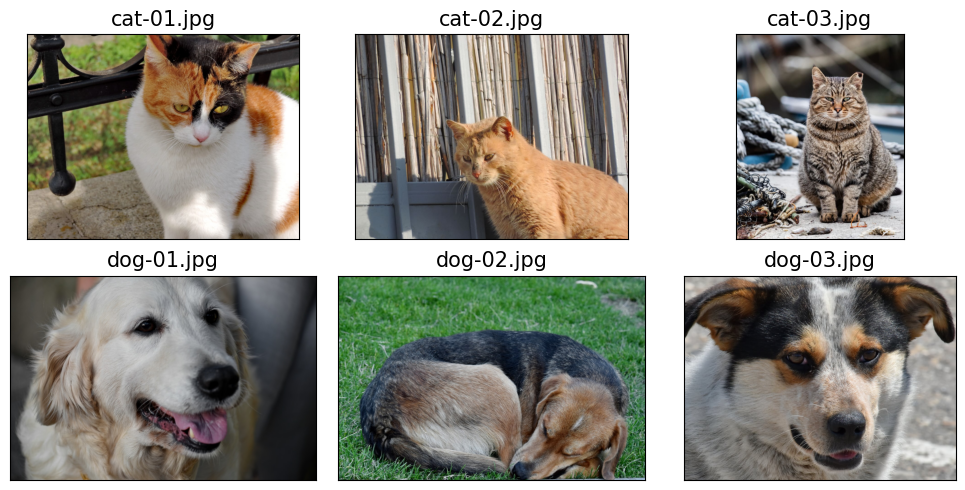

In [ ]:
import matplotlib.pyplot as plt
import os
from PIL import Image

fig = plt.figure(figsize=(10, 5))
for i, file in enumerate(file_list):
    img = Image.open(file)
    print('Image shape:', np.array(img).shape)
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(img)
    ax.set_title(os.path.basename(file), size=15)
plt.tight_layout()
plt.show()

In [ ]:
# Label it
labels = [1 if 'dog' in 
             os.path.basename(file) else 0
                     for file in file_list]
print(labels)

[0, 0, 0, 1, 1, 1]


In [36]:
# Join images and labels
class ImageDataset(Dataset):
    def __init__(self, file_list, labels):
        self.file_list = file_list
        self.labels = labels

    def __getitem__(self, index):
        file = self.file_list[index]
        label = self.labels[index]
        return file, label

    def __len__(self):
        return len(self.labels)
image_dataset = ImageDataset(file_list, labels)
for file, label in image_dataset:
    print(file, label)

data/cat_dog_images/cat-01.jpg 0
data/cat_dog_images/cat-02.jpg 0
data/cat_dog_images/cat-03.jpg 0
data/cat_dog_images/dog-01.jpg 1
data/cat_dog_images/dog-02.jpg 1
data/cat_dog_images/dog-03.jpg 1


In [ ]:
# Tranfomations
import torchvision.transforms as transforms

img_height, img_width = 80, 120
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((img_height, img_width)),
])

# Update the ImageDataset class with the transform we just defined
class ImageDataset(Dataset):
    def __init__(self, file_list, labels, transform=None):
        self.file_list = file_list
        self.labels = labels
        self.transform = transform

    def __getitem__(self, index):
        img = Image.open(self.file_list[index])
        if self.transform is not None:
            img = self.transform(img)
        label = self.labels[index]
        return img, label
    def __len__(self):
        return len(self.labels)

image_dataset = ImageDataset(file_list, labels, transform)

/Users/krit/miniconda3/envs/mlenv/lib/python3.12/site-packages/torchvision/io/image.py:14: UserWarning: Failed to load image Python extension: 'dlopen(/Users/krit/miniconda3/envs/mlenv/lib/python3.12/site-packages/torchvision/image.so, 0x0006): Library not loaded: @rpath/libjpeg.9.dylib
  Referenced from: <367D4265-B20F-34BD-94EB-4F3EE47C385B> /Users/krit/miniconda3/envs/mlenv/lib/python3.12/site-packages/torchvision/image.so
  Reason: tried: '/Users/krit/miniconda3/envs/mlenv/lib/python3.12/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/Users/krit/miniconda3/envs/mlenv/lib/python3.12/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/Users/krit/miniconda3/envs/mlenv/lib/python3.12/lib-dynload/../../libjpeg.9.dylib' (no such file), '/Users/krit/miniconda3/envs/mlenv/bin/../lib/libjpeg.9.dylib' (no such file)'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wro

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.000551827..1.0000002].


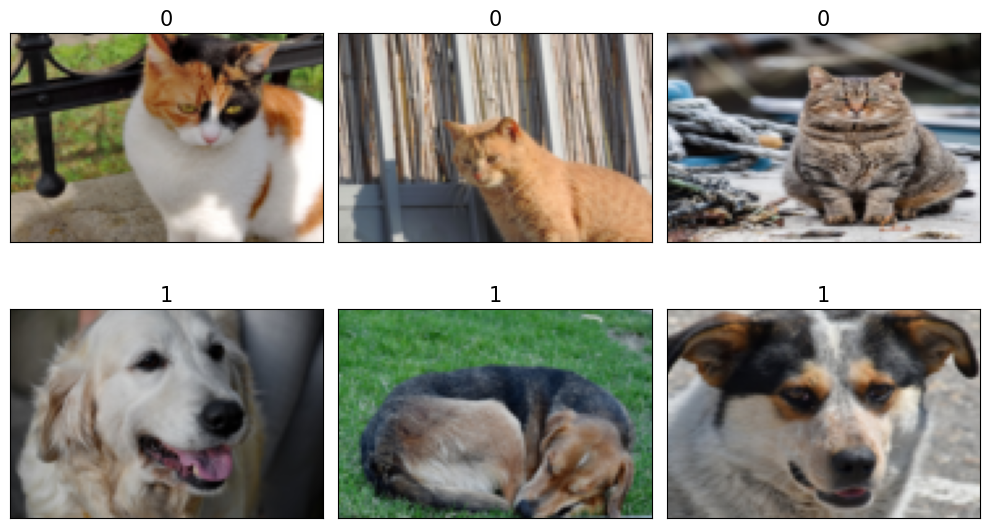

In [38]:
fig = plt.figure(figsize=(10, 6))
for i, example in enumerate(image_dataset):
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(example[0].numpy().transpose((1, 2, 0)))
    ax.set_title(f'{example[1]}', size=15)

plt.tight_layout()
plt.show()

The __getitem__ method in the ImageDataset class wraps all four steps into a single function, including the loading of the raw content (images and labels), decoding the images into tensors, and resizing the images.

In [ ]:
# 